# Noise modelling

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from func_lib import zemax_to_array

In [38]:
# Gaussian
mu = 0
sigma = 1

# Possion
lam =1e3

vals_norm = []
vals_pois = []
for i in range(int(1e4)):
    vals_norm.append(np.random.normal(mu, sigma))
    vals_pois.append(np.random.poisson(lam=lam))

In [73]:
psf_data, metadata = zemax_to_array('Toliman_on-axis_broadband.txt')

In [99]:
def poisson(im, t):
    """
    Adds possion photon noise to an image by 
    """
    return np.random.poisson(im*t)

def gaussian(im, mu, sig):
    """
    Adds gaussian noise to an image
    """
    noise = np.round(np.random.normal(loc=mu, scale=sig, size=im.shape))
    return im + noise

In [109]:
im = psf_data*1e3
psf_noisy_poiss = poisson(im, 1)
psf = gaussian(psf_noisy_poiss, 500, 50)

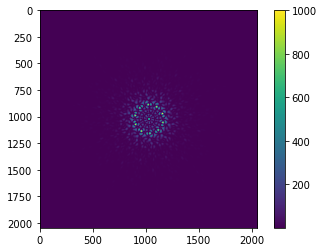

In [110]:
plt.imshow(im)
plt.colorbar()

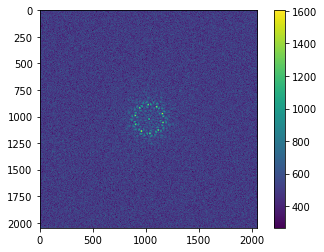

In [111]:
plt.imshow(psf)
plt.colorbar()

In [112]:
c = psf.shape[0]//2
s = 5

print(psf[c-s:c+s, c-s:c+s])

[[ 994. 1034. 1101. 1158. 1245. 1170. 1225. 1170. 1099. 1045.]
 [1081. 1172. 1124. 1186. 1184. 1196. 1267. 1255. 1256. 1097.]
 [1082. 1172. 1292. 1326. 1293. 1348. 1307. 1140. 1241. 1159.]
 [1122. 1204. 1225. 1211. 1331. 1353. 1294. 1211. 1322. 1125.]
 [1081. 1153. 1174. 1314. 1338. 1360. 1313. 1286. 1261. 1200.]
 [1071. 1231. 1323. 1310. 1241. 1346. 1293. 1328. 1215. 1142.]
 [1109. 1223. 1140. 1239. 1262. 1264. 1370. 1276. 1229. 1118.]
 [ 986. 1211. 1202. 1214. 1188. 1324. 1231. 1200. 1172. 1096.]
 [ 903. 1139. 1071. 1178. 1183. 1249. 1230. 1192. 1016. 1138.]
 [ 906. 1044. 1017. 1114. 1086. 1106. 1238. 1022. 1160. 1035.]]
